In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow, tensorflow.keras
from tensorflow.keras.preprocessing.text import Tokenizer
from collections import Counter
import nltk
import json
from wordcloud import WordCloud

In [320]:
anime_df = pd.read_csv('anime_scraper/more_anime_reviews.csv')
anime_df.sample(30)

,show_title,review,rating,tags
1235,boruto-naruto-next-generations,Boruto is not a squid. I am not sure how any o...,3.0,"['fantasy', 'adventure', 'action', 'shonen']"
3343,jojos-bizarre-adventure,JoJo is fantastic. Sometimes you just need a ...,5.0,[]
2161,naruto-shippuden,"Before continuing on with this review, I would...",1.0,[]
664,black-clover,While this show borrows concepts and ideas fro...,5.0,"['fantasy', 'adventure', 'action', 'shonen', '..."
4313,naruto,"Naruto is the story of battling ninjas, sure, ...",4.5,[]
3410,that-time-i-got-reincarnated-as-a-slime,I haven't actually ever written a review on th...,3.0,"['fantasy', 'action', 'adventure', 'isekai', '..."
4648,fullmetal-alchemist-brotherhood,I hear from many people that this is the best ...,5.0,"['action', 'adventure', 'fantasy', 'drama', 's..."
1673,sword-art-online,I must say this is one of the most interesting...,5.0,['fantasy']
3287,jojos-bizarre-adventure,I was just recently introduced to jojo when it...,5.0,[]
1456,food-wars-shokugeki-no-soma,This is by far the best new show I've watched ...,5.0,"['action', 'adventure', 'comedy', 'shonen']"


In [321]:
shows = anime_df.show_title.unique()
shows

array(['my-hero-academia', 'black-clover', 'dr-stone',
       'boruto-naruto-next-generations', 'food-wars-shokugeki-no-soma',
       'welcome-to-demon-school-iruma-kun', 'fire-force',
       'sword-art-online', 'naruto-shippuden',
       'rezero-starting-life-in-another-world-',
       'jojos-bizarre-adventure',
       'that-time-i-got-reincarnated-as-a-slime',
       'demon-slayer-kimetsu-no-yaiba', 'hunter-x-hunter', 'naruto',
       'dragon-ball-super', 'fullmetal-alchemist-brotherhood'],
      dtype=object)

In [322]:
ratings = [my_hero['rating'].mean(), black_clover['rating'].mean(), dr_stone['rating'].mean(), boruto_naruto_next_generations['rating'].mean(), food_wars_shokugeki_no_sama['rating'].mean(), welcome_to_demon_school['rating'].mean(), 
fire_force['rating'].mean(), sword_art_online ['rating'].mean(), naruto_shippuden['rating'].mean(), rezero_starting_life['rating'].mean(), jojos_bizzare_adventure['rating'].mean(), slime['rating'].mean(),
demon_slayer['rating'].mean(), naruto['rating'].mean(), hunter_x_hunter ['rating'].mean(), dragon_ball_super['rating'].mean(), fullmetal_alchemist['rating'].mean()]
my_hero = anime_df.loc[anime_df['show_title'] == 'my-hero-academia']

black_clover = anime_df.loc[anime_df['show_title'] == 'black-clover']

dr_stone = anime_df.loc[anime_df['show_title'] == 'dr-stone']

boruto_naruto_next_generations = anime_df.loc[anime_df['show_title'] == 'boruto-naruto-next-generations']

food_wars_shokugeki_no_sama = anime_df.loc[anime_df['show_title'] == 'food-wars-shokugeki-no-soma']

welcome_to_demon_school = anime_df.loc[anime_df['show_title'] == 'welcome-to-demon-school-iruma-kun']

fire_force = anime_df.loc[anime_df['show_title'] == 'fire-force']

sword_art_online = anime_df.loc[anime_df['show_title'] == 'sword-art-online']

naruto_shippuden = anime_df.loc[anime_df['show_title'] == 'naruto-shippuden']

rezero_starting_life = anime_df.loc[anime_df['show_title'] == 'rezero-starting-life-in-another-world-']

jojos_bizzare_adventure = anime_df.loc[anime_df['show_title'] == 'jojos-bizarre-adventure']

slime = anime_df.loc[anime_df['show_title'] == 'that-time-i-got-reincarnated-as-a-slime']

demon_slayer = anime_df.loc[anime_df['show_title'] == 'demon-slayer-kimetsu-no-yaiba']

hunter_x_hunter = anime_df.loc[anime_df['show_title'] == 'hunter-x-hunter']

naruto = anime_df.loc[anime_df['show_title'] == 'naruto']

dragon_ball_super = anime_df.loc[anime_df['show_title'] == 'dragon-ball-super']

fullmetal_alchemist = anime_df.loc[anime_df['show_title'] == 'fullmetal-alchemist-brotherhood']

ratings

[4.949664429530201,
 3.3925619834710745,
 4.864035087719298,
 2.9677871148459385,
 4.909090909090909,
 4.9375,
 4.5,
 4.69661733615222,
 4.26889848812095,
 4.752771618625277,
 4.991071428571429,
 4.604166666666667,
 4.961904761904762,
 4.892307692307693,
 4.989754098360656,
 4.580128205128205,
 4.991525423728813]

In [323]:
stop_words = set(stopwords.words('english'))


In [324]:
data = anime_df['review'].tolist()

In [325]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
all_words = tokenizer.get_config()
all_words = all_words['word_counts']
all_words = json.loads(all_words)
all_words_list = list(all_words.keys())

In [326]:
filtered_words = []
for i in range(len(list(all_words.keys()))):
    if all_words_list[i] not in stop_words:
        filtered_words.append((all_words_list[i], list(all_words.values())[i]))
                              
filtered_words.sort(key=lambda tup: -tup[1])
filtered_words[:25]

[('anime', 7705),
 ('show', 5571),
 ('like', 4202),
 ('characters', 3948),
 ('one', 3559),
 ('story', 3494),
 ('series', 3477),
 ('naruto', 3043),
 ('really', 2876),
 ('character', 2822),
 ('watch', 2714),
 ('good', 2686),
 ('first', 2588),
 ('episode', 2530),
 ('episodes', 2340),
 ('time', 2251),
 ('great', 1969),
 ('get', 1934),
 ('even', 1891),
 ('would', 1856),
 ('well', 1813),
 ('much', 1777),
 ('watching', 1776),
 ('love', 1730),
 ('best', 1544)]

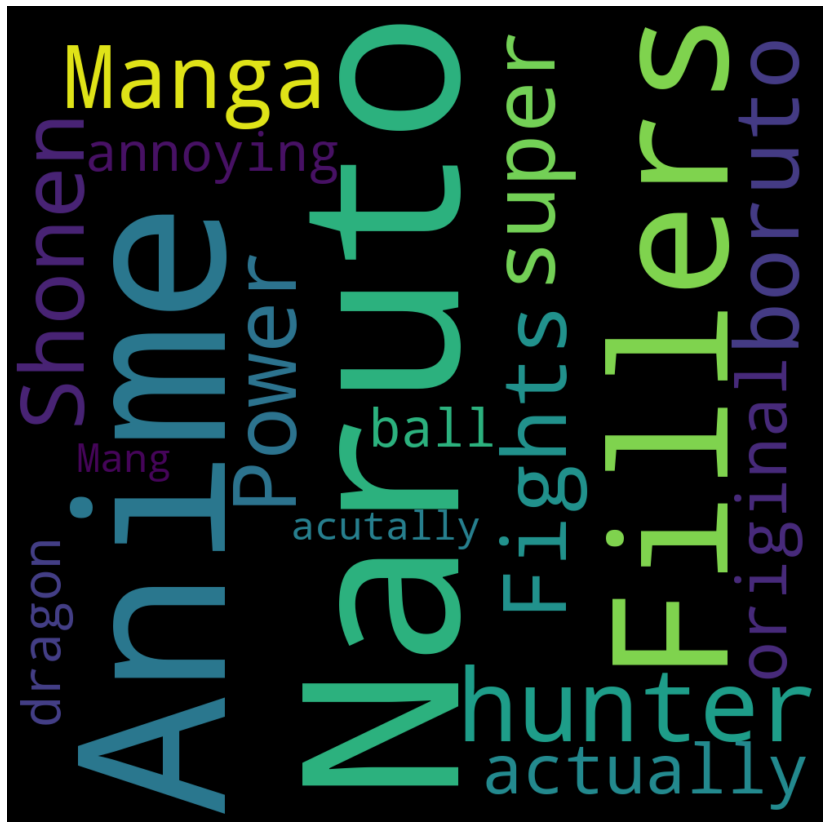

In [327]:
text=("Anime, Anime, Anime, Anime, Anime, Anime, Anime, Mang, Manga, Manga, Manga, Shonen, Shonen, Shonen, Power, Power, Power, Fights, Fights, Fights, Naruto, Naruto, Naruto, Naruto, Naruto, Naruto, Naruto, Naruto, Fillers, Fillers, Fillers, Fillers, boruto, boruto, boruto, actually, actually, acutally, hunter, hunter, hunter, hunter, original, original, annoying, annoying, super, super, super, dragon, dragon, ball, ball,  ")
# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=1000, margin=0).generate(text)
 
# Display the generated image:
plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [328]:
genre_list = []
def list_to_string(tags):
    global genre_list
    genre_list += (eval(tags))
    return 0

anime_df['tags'].apply(list_to_string)

0       0
1       0
2       0
3       0
4       0
       ..
4695    0
4696    0
4697    0
4698    0
4699    0
Name: tags, Length: 4700, dtype: int64

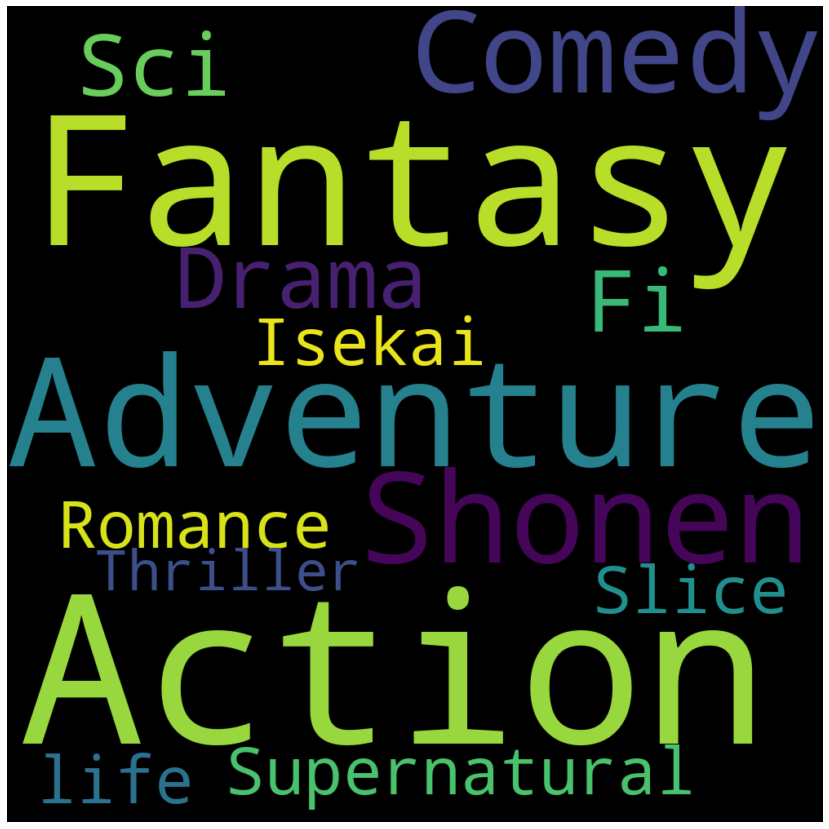

In [329]:
text=("Action Action Action, Action, Fantasy, Fantasy, Fantasy, Shonen, Shonen, Adventure, Adventure, Adventure, Comedy, Comedy, Sci-Fi, Drama, Supernatural, Romance, Isekai, Slice of life, Thriller")
# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=1000, margin=0).generate(text)
 
# Display the generated image:
plt.figure(figsize=(25,15))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


ValueError: args must contain [xmin xmax ymin ymax]

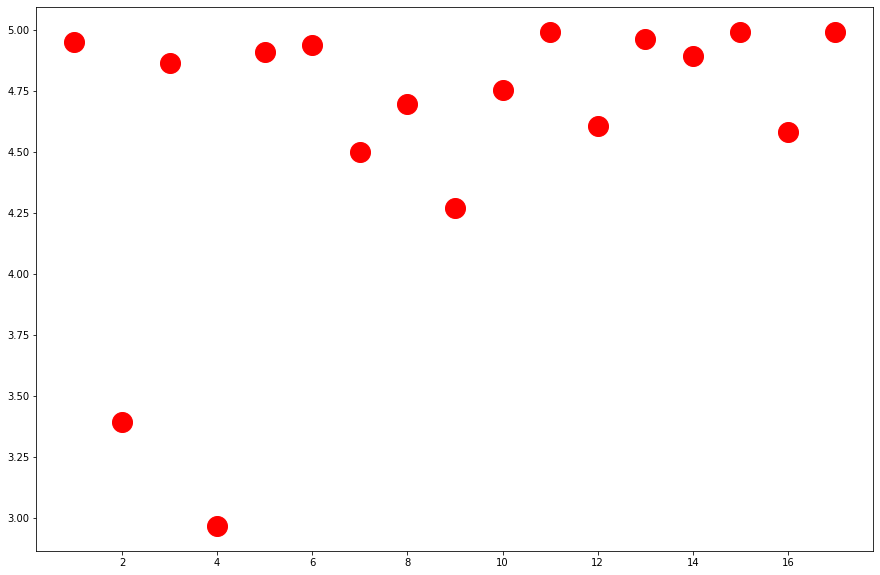

In [330]:
plt.figure(figsize=(15,10))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], ratings, 'ro', markersize=20)
plt.axis([1, 2, 3, 4, 5])
plt.show()

In [331]:
fullmetal_alchemist

,show_title,review,rating,tags
4582,fullmetal-alchemist-brotherhood,This is probably one of the first anime shows ...,5.0,"['action', 'adventure', 'fantasy', 'drama', 's..."
4583,fullmetal-alchemist-brotherhood,This one one of the few anime where I actually...,5.0,"['action', 'adventure', 'fantasy', 'drama', 's..."
4584,fullmetal-alchemist-brotherhood,"Just another 5/5 star rating, but honestly thi...",5.0,"['action', 'adventure', 'fantasy', 'drama', 's..."
4585,fullmetal-alchemist-brotherhood,This anime is simply one of the best shows I'v...,5.0,"['action', 'adventure', 'fantasy', 'drama', 's..."
4586,fullmetal-alchemist-brotherhood,Art is something that evokes an emotional reac...,5.0,"['action', 'adventure', 'fantasy', 'drama', 's..."
...,...,...,...,...
4695,fullmetal-alchemist-brotherhood,Just watch it yourself to be honest...I wouldn...,5.0,"['action', 'adventure', 'fantasy', 'drama', 's..."
4696,fullmetal-alchemist-brotherhood,"I'd tell you everything about this show, but c...",4.0,"['action', 'adventure', 'fantasy', 'drama', 's..."
4697,fullmetal-alchemist-brotherhood,"I don't care too much for this show, but I rat...",5.0,"['action', 'adventure', 'fantasy', 'drama', 's..."
4698,fullmetal-alchemist-brotherhood,Most shows are either light and fun or deep an...,5.0,"['action', 'adventure', 'fantasy', 'drama', 's..."


In [332]:
my_hero

,show_title,review,rating,tags
0,my-hero-academia,It is Here! This is the future of the Shonen g...,5.0,"['action', 'fantasy', 'shonen', 'adventure']"
1,my-hero-academia,SHORT VERSION: This is one of the most thrilli...,5.0,"['action', 'fantasy', 'shonen', 'adventure']"
2,my-hero-academia,Had you ever found your favorite anime was end...,5.0,"['action', 'fantasy', 'shonen', 'adventure']"
3,my-hero-academia,Potential SpoilersMinor spoilers from Season 1...,5.0,"['action', 'fantasy', 'shonen', 'adventure']"
4,my-hero-academia,Ok so I kept saying I wouldn't watch this show...,5.0,"['action', 'fantasy', 'shonen', 'adventure']"
...,...,...,...,...
293,my-hero-academia,Naruto was the masterpiece of modern anime so ...,5.0,"['action', 'fantasy', 'shonen', 'adventure']"
294,my-hero-academia,"The show runs at shonen pace, often taking 3-5...",5.0,"['action', 'fantasy', 'shonen', 'adventure']"
295,my-hero-academia,MHA is as we all know very popular show but po...,5.0,"['action', 'fantasy', 'shonen', 'adventure']"
296,my-hero-academia,Not awful but not good at all. To sum it up re...,5.0,"['action', 'fantasy', 'shonen', 'adventure']"
